# IMPORTING NECESSARY PACKAGES

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
from pathlib import Path

# IMPORTING DATA

In [2]:
from gradient_boosting import SyntheticData

test = SyntheticData(noise=200)
df = test.dataframe()
df

,Column_0,Target_0
0,0.931280,277.018108
1,0.087047,-270.340771
2,-1.057711,140.482504
3,0.314247,-38.688700
4,-0.479174,25.256394
...,...,...
95,1.852278,92.695119
96,-1.424748,-289.429072
97,-0.719844,-207.149564
98,-0.072010,143.894431


# PLOTTING

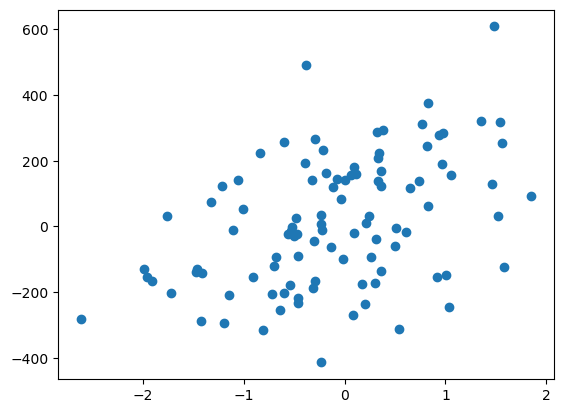

In [3]:
plt.scatter(df["Column_0"], df["Target_0"])
plt.show()

# GRADIENT BOOSTING

## MODEL 1

In [4]:
# model 1 is always mean
df["Predict_1"] = df["Target_0"].mean()
df

,Column_0,Target_0,Predict_1
0,0.931280,277.018108,13.36809
1,0.087047,-270.340771,13.36809
2,-1.057711,140.482504,13.36809
3,0.314247,-38.688700,13.36809
4,-0.479174,25.256394,13.36809
...,...,...,...
95,1.852278,92.695119,13.36809
96,-1.424748,-289.429072,13.36809
97,-0.719844,-207.149564,13.36809
98,-0.072010,143.894431,13.36809


In [5]:
# Calculating the residual of model 1
df["Residual_1"] = df["Target_0"] - df["Predict_1"]
df

,Column_0,Target_0,Predict_1,Residual_1
0,0.931280,277.018108,13.36809,263.650019
1,0.087047,-270.340771,13.36809,-283.708861
2,-1.057711,140.482504,13.36809,127.114414
3,0.314247,-38.688700,13.36809,-52.056789
4,-0.479174,25.256394,13.36809,11.888304
...,...,...,...,...
95,1.852278,92.695119,13.36809,79.327030
96,-1.424748,-289.429072,13.36809,-302.797162
97,-0.719844,-207.149564,13.36809,-220.517654
98,-0.072010,143.894431,13.36809,130.526342


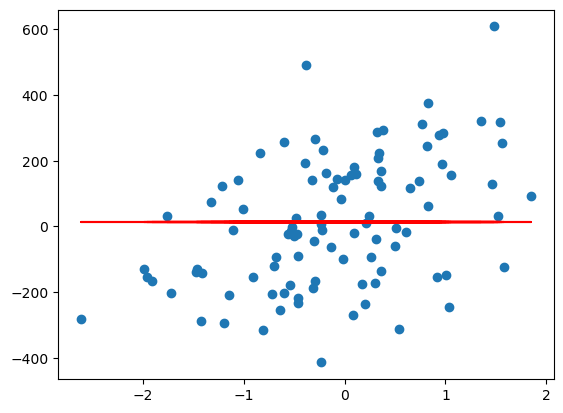

In [6]:
# Plotting the best fit line using
plt.scatter(df["Column_0"], df["Target_0"])
plt.plot(df["Column_0"], df["Predict_1"], color = "red")
plt.show()

## MODEL 2

In [8]:
from sklearn.tree import DecisionTreeRegressor

# While creating the decision tree model, make sure to have max leaf nodes between 8-32 (This is proven from research)
tree_1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree_1.fit(df["Column_0"].values.reshape(100,1), df["Residual_1"])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0
